In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# **Loading the data**

In [2]:
try:
 df=pd.read_csv(r"C:\Users\user\Downloads\filtered_final.csv",encoding='ISO-8859-1')
 print(df.head())
except Exception as e:
    print("An error occurred:", e)

        brand              model    year  kilometer     fuel  engine  \
0  chana star  q20 simple cabine  2015.0      50000   diesel     NaN   
1       chery                 qq  2010.0     113000  essence     1.1   
2       chery                 qq  2010.0     170000  essence     1.1   
3       chery                 qq  2014.0     220000  essence     1.1   
4       chery                 qq  2014.0     270000  essence     1.1   

  transmission   price  horsepower  
0          NaN  750000        54.0  
1     manuelle  750000        68.0  
2     manuelle  750000        68.0  
3     manuelle  750000        68.0  
4     manuelle  750000        68.0  


In [3]:
df

,brand,model,year,kilometer,fuel,engine,transmission,price,horsepower
0,chana star,q20 simple cabine,2015.0,50000,diesel,NaN,NaN,750000,54.0
1,chery,qq,2010.0,113000,essence,1.1,manuelle,750000,68.0
2,chery,qq,2010.0,170000,essence,1.1,manuelle,750000,68.0
3,chery,qq,2014.0,220000,essence,1.1,manuelle,750000,68.0
4,chery,qq,2014.0,270000,essence,1.1,manuelle,750000,68.0
...,...,...,...,...,...,...,...,...,...
16188,bmw,serie 3,2022.0,92000,diesel,NaN,automatique,9850000,190.0
16189,mercedes,carlsson classe s,2015.0,200000,diesel,NaN,automatique,9850000,250.0
16190,renault,kangoo privilege plus,2015.0,283000,diesel,1.5,manuelle,9850000,110.0
16191,renault,clio 4 dynamique plus,2015.0,171000,essence,1.2,manuelle,9860000,75.0


In [4]:
df.shape

(16193, 9)

In [5]:
df.dtypes

brand            object
model            object
year            float64
kilometer         int64
fuel             object
engine          float64
transmission     object
price             int64
horsepower      float64
dtype: object

In [6]:
df.describe()

,year,kilometer,engine,price,horsepower
count,16192.000000,1.619300e+04,12199.000000,1.619300e+04,11822.000000
mean,2014.118577,2.221207e+05,1.527043,2.635133e+06,100.488496
std,5.446095,3.227629e+05,0.944888,1.447959e+06,34.464666
min,1972.000000,5.000000e+03,0.100000,7.500000e+05,47.000000
25%,2012.000000,9.700000e+04,1.300000,1.600000e+06,82.000000
50%,2014.000000,1.850000e+05,1.500000,2.300000e+06,91.000000
75%,2018.000000,2.721470e+05,1.600000,3.200000e+06,110.000000
max,2024.000000,9.000000e+06,100.100000,9.870000e+06,395.000000


In [7]:
df.isnull().sum(axis = 0)

brand              0
model             41
year               1
kilometer          0
fuel             219
engine          3994
transmission     304
price              0
horsepower      4371
dtype: int64

In [8]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts())
    print('\n' + '*' * 20 + '\n')

brand : 72
brand
renault       3320
peugeot       2404
hyundai       1485
volkswagen    1191
kia           1009
              ... 
saipa            1
haunghai         1
wuling           1
volvo            1
saab             1
Name: count, Length: 72, dtype: int64

********************

model : 1774
model
symbol               537
stepway              445
208 allure           349
clio 4 gt line       320
kangoo               288
                    ... 
c c250 cdi classe      1
vito                   1
murano z51             1
3008 style             1
35 a3 tdi              1
Name: count, Length: 1774, dtype: int64

********************

year : 42
year
2013.0    1622
2019.0    1569
2012.0    1449
2014.0    1295
2018.0    1287
2015.0    1253
2021.0     847
2022.0     834
2011.0     817
2017.0     815
2016.0     783
2010.0     527
2008.0     489
2009.0     460
2020.0     330
2007.0     316
2006.0     201
2023.0     188
2005.0     178
2002.0     153
2004.0     135
2001.0     132
2003.0     

### **Things to work on :**


* **IB** Kilometers and price must be converted into numerical values *DONE*
* **IB**  Extract more imformations from engine *DONE*
* **IB** Correct misspellings in the brand column if doable, delete nonsenssical rows
* **IB**  Correct where brand name = model name
* **IB** Convert everything intol lower case first  *DONE*
* **IB**  Kilometers have the same problem as price : number.rest_of_number *DONE*
* **IB**  Check with melissa abt model name (duplicates)
* **MH** Convert cylinderr and horsepower to float and int (resp)
* **MH** Replace year>2024 and <1960 by NaN and replaced the missing values by the mean  *DONE*
* **MH** To correct misspelling there's a tool called *fuzzywuzzy* (library in py)
* **MH**  Reducing the NaN values in 'fuel' by using "ess" contained in 'engine'  *DONE*
* **MH** See if we can keep the column 'engine' though the NaN values are over 10k (!!!)

### **Solutions im thinking of :**


*   Compare the empty cells in other columns with the new retrieved data from engine and fill it with it when necessary
*   len(brand_name) < 4 {delete} after correcting what can be corrected


# **Cleaning**

In [9]:
df.columns

Index(['brand', 'model', 'year', 'kilometer', 'fuel', 'engine', 'transmission',
       'price', 'horsepower'],
      dtype='object')

In [10]:
df.head()

,brand,model,year,kilometer,fuel,engine,transmission,price,horsepower
0,chana star,q20 simple cabine,2015.0,50000,diesel,NaN,NaN,750000,54.0
1,chery,qq,2010.0,113000,essence,1.1,manuelle,750000,68.0
2,chery,qq,2010.0,170000,essence,1.1,manuelle,750000,68.0
3,chery,qq,2014.0,220000,essence,1.1,manuelle,750000,68.0
4,chery,qq,2014.0,270000,essence,1.1,manuelle,750000,68.0


## **e**

In [11]:
df['model'] = df['model'].str.replace(r'\b\d{4}\b', '',regex=True)
df['model'] = df['model'].str.replace(r'^(.+)\s+\1$', r'\1',regex=True)

In [12]:
df['kilometer']

0         50000
1        113000
2        170000
3        220000
4        270000
          ...  
16188     92000
16189    200000
16190    283000
16191    171000
16192    258000
Name: kilometer, Length: 16193, dtype: int64

### **We made sure for 'horspower' to be a clean numerical value**

In [13]:
df['horsepower']

0         54.0
1         68.0
2         68.0
3         68.0
4         68.0
         ...  
16188    190.0
16189    250.0
16190    110.0
16191     75.0
16192    174.0
Name: horsepower, Length: 16193, dtype: float64

In [14]:
df.isnull().sum(axis = 0)

brand              0
model             41
year               1
kilometer          0
fuel             219
engine          3994
transmission     304
price              0
horsepower      4371
dtype: int64

## **Eliminating non-realistiv values by 'year', replacing illogical values in 'fuel' by Nan, and turning everything into lower case**

In [15]:
df.loc[(df['year'] < 1970) | (df['year'] > 2024), 'year'] = np.nan

In [16]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

In [17]:
df['fuel'].value_counts()

fuel
diesel     7761
essence    6758
gpl        1455
Name: count, dtype: int64

## **Correcting some brand names (using Lavenstein distance)**

In [18]:
ref_brand = df['brand'].value_counts()
ref_brand = ref_brand.index[:70].tolist()

In [19]:
# Library for comparing sequences and strings
import difflib

In [20]:
# Function to find closest match for a brand name in the reference list
def find_closest_match(brand_name, reference_list):
    closest_match = difflib.get_close_matches(brand_name, reference_list, n=3, cutoff=0.6)
    if closest_match:
        return closest_match[0]
    else:
        return None

In [21]:
for index, row in df.iterrows():
    brand_name = row['brand']
    if not pd.isnull(brand_name):
        corrected_brand = find_closest_match(brand_name, ref_brand)
        if corrected_brand:
            df.at[index, 'brand'] = corrected_brand

## **Handeling Nan values**

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
# Separating numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputing numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputing categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

## **Droping any duplicated rows**

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts())
    print('\n' + '*' * 20 + '\n')

brand : 71
brand
renault          3162
peugeot          2323
hyundai          1421
volkswagen       1135
kia               962
                 ... 
infiniti            1
hafei motors        1
volvo               1
bugatti             1
wuling              1
Name: count, Length: 71, dtype: int64

********************

model : 1762
model
symbol                549
stepway               428
208 allure            327
clio 4 gt line        299
kangoo                276
                     ... 
dx tmax                 1
frigo                   1
a3 ambition             1
hatchback ls sonic      1
35 a3 tdi               1
Name: count, Length: 1762, dtype: int64

********************

year : 43
year
2013.000000    1558
2019.000000    1481
2012.000000    1390
2014.000000    1247
2018.000000    1239
2015.000000    1201
2021.000000     817
2022.000000     798
2017.000000     785
2011.000000     784
2016.000000     756
2010.000000     499
2008.000000     462
2009.000000     440
2020.000000     3

## **Handeling illogical values by 'kilometer', deleting specific rows by 'fuel' and 'transmission'**

In [26]:
# Delete all rows where the 'kilometer' < 200km
df = df[df['kilometer'] > 200]

## **Checking what is left fromt the data frame, reseting the indexes**

In [27]:
df.shape

(15507, 9)

In [28]:
df.reset_index(drop=True, inplace=True)
# Rename the index column to 'original_index'
df.rename_axis('original_index', axis=0, inplace=True)

# **EDA**

In [29]:
df.describe()

,year,kilometer,engine,price,horsepower
count,15507.000000,1.550700e+04,15507.000000,1.550700e+04,15507.000000
mean,2014.122404,2.215527e+05,1.527222,2.637065e+06,100.528162
std,5.447400,3.193418e+05,0.836082,1.448981e+06,29.526849
min,1972.000000,5.000000e+03,0.100000,7.500000e+05,47.000000
25%,2012.000000,9.700000e+04,1.400000,1.600000e+06,85.000000
50%,2014.000000,1.850000e+05,1.527043,2.300000e+06,100.488496
75%,2018.000000,2.720000e+05,1.600000,3.200000e+06,105.000000
max,2024.000000,9.000000e+06,100.100000,9.870000e+06,395.000000


## **Distribution of 'price' and it's skewness**

Skewness of 'price': 1.683088387443846


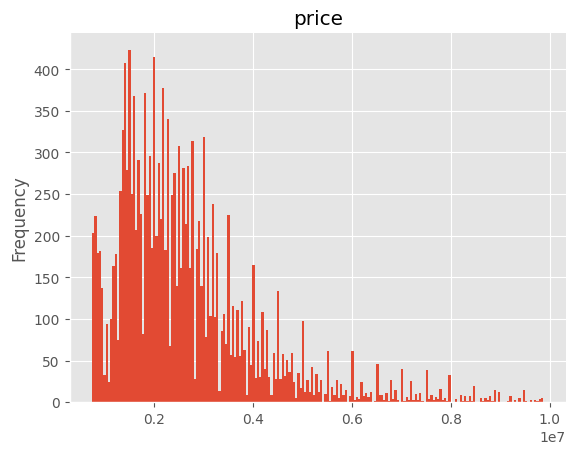

In [30]:
price_skewness = df['price'].skew()
print("Skewness of 'price':", price_skewness)

df['price'].plot(kind='hist', bins=200, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **We can see that 'price' is left skewed, so it needs to be normalized**
### **after trying normalization we realize that it doesn't help with the performances so we prefer keeping it this way**

## **Distribution of 'kilometre' and it's skewness**

Skewness of 'kilometer': 10.551364610307303


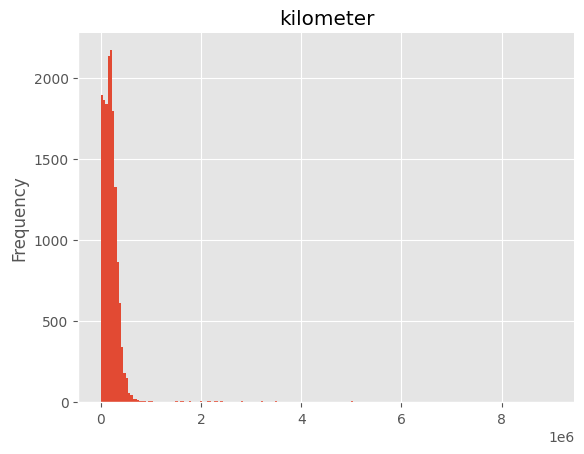

In [31]:
kilometer_skewness = df['kilometer'].skew()
print("Skewness of 'kilometer':", kilometer_skewness)

df['kilometer'].plot(kind='hist', bins=200, title='kilometer')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **'kilometer' is also left skewed, and need to be normalized**

## **Distribution of the cars per their model year**

Text(0, 0.5, 'Count')

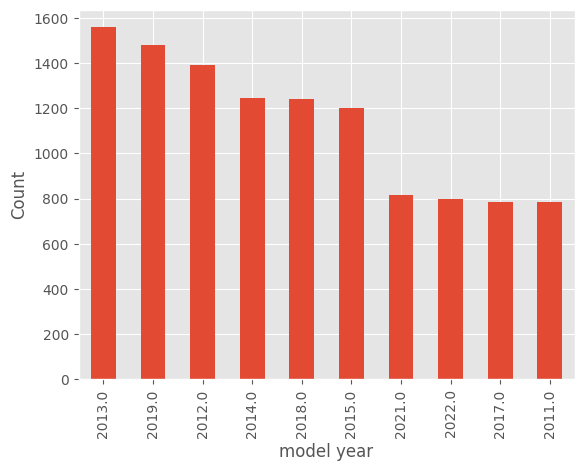

In [32]:
ax = df['year'].value_counts().head(10).plot(kind='bar')
ax.set_xlabel('model year')
ax.set_ylabel('Count')

## **Top 10 brands per their average price**

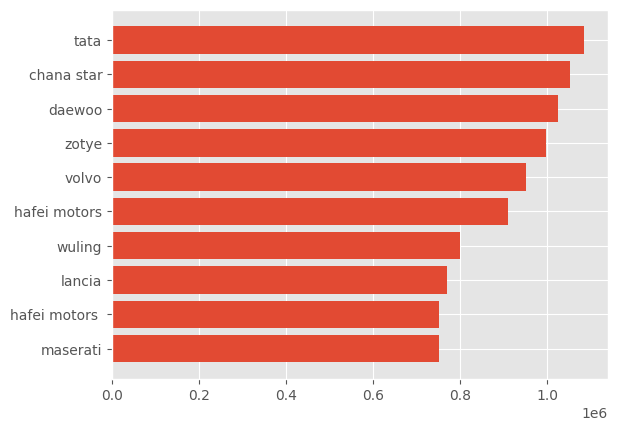

In [33]:
avg_price = df.groupby('brand')['price'].mean()
top_10 = avg_price.sort_values(ascending=True).head(10)
plt.barh(top_10.index, top_10)
plt.show()

## **Average price of cars by their transmission type**

<Axes: xlabel='transmission'>

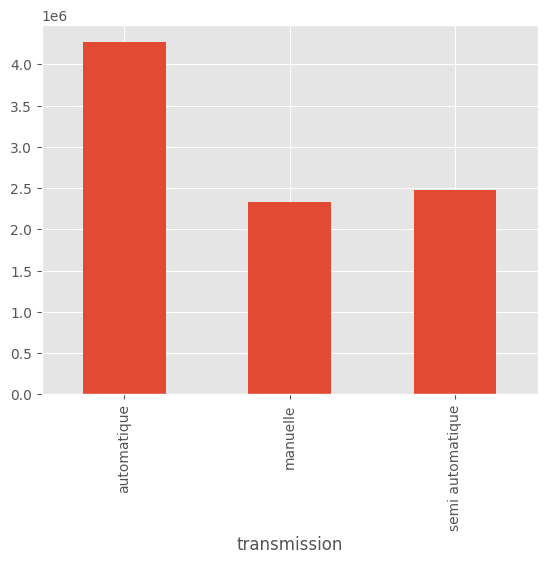

In [34]:
df.groupby('transmission')['price'].mean().plot(kind='bar')

## **Average price of cars by their fuel type**

<Axes: xlabel='fuel'>

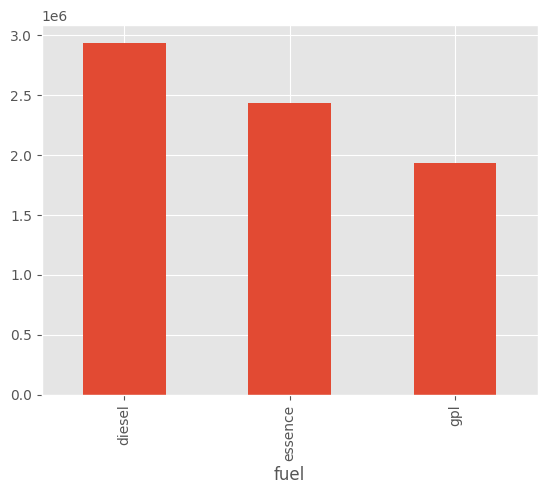

In [35]:
df.groupby('fuel')['price'].mean().plot(kind='bar')

## **Exploring the relations between diffrent features**

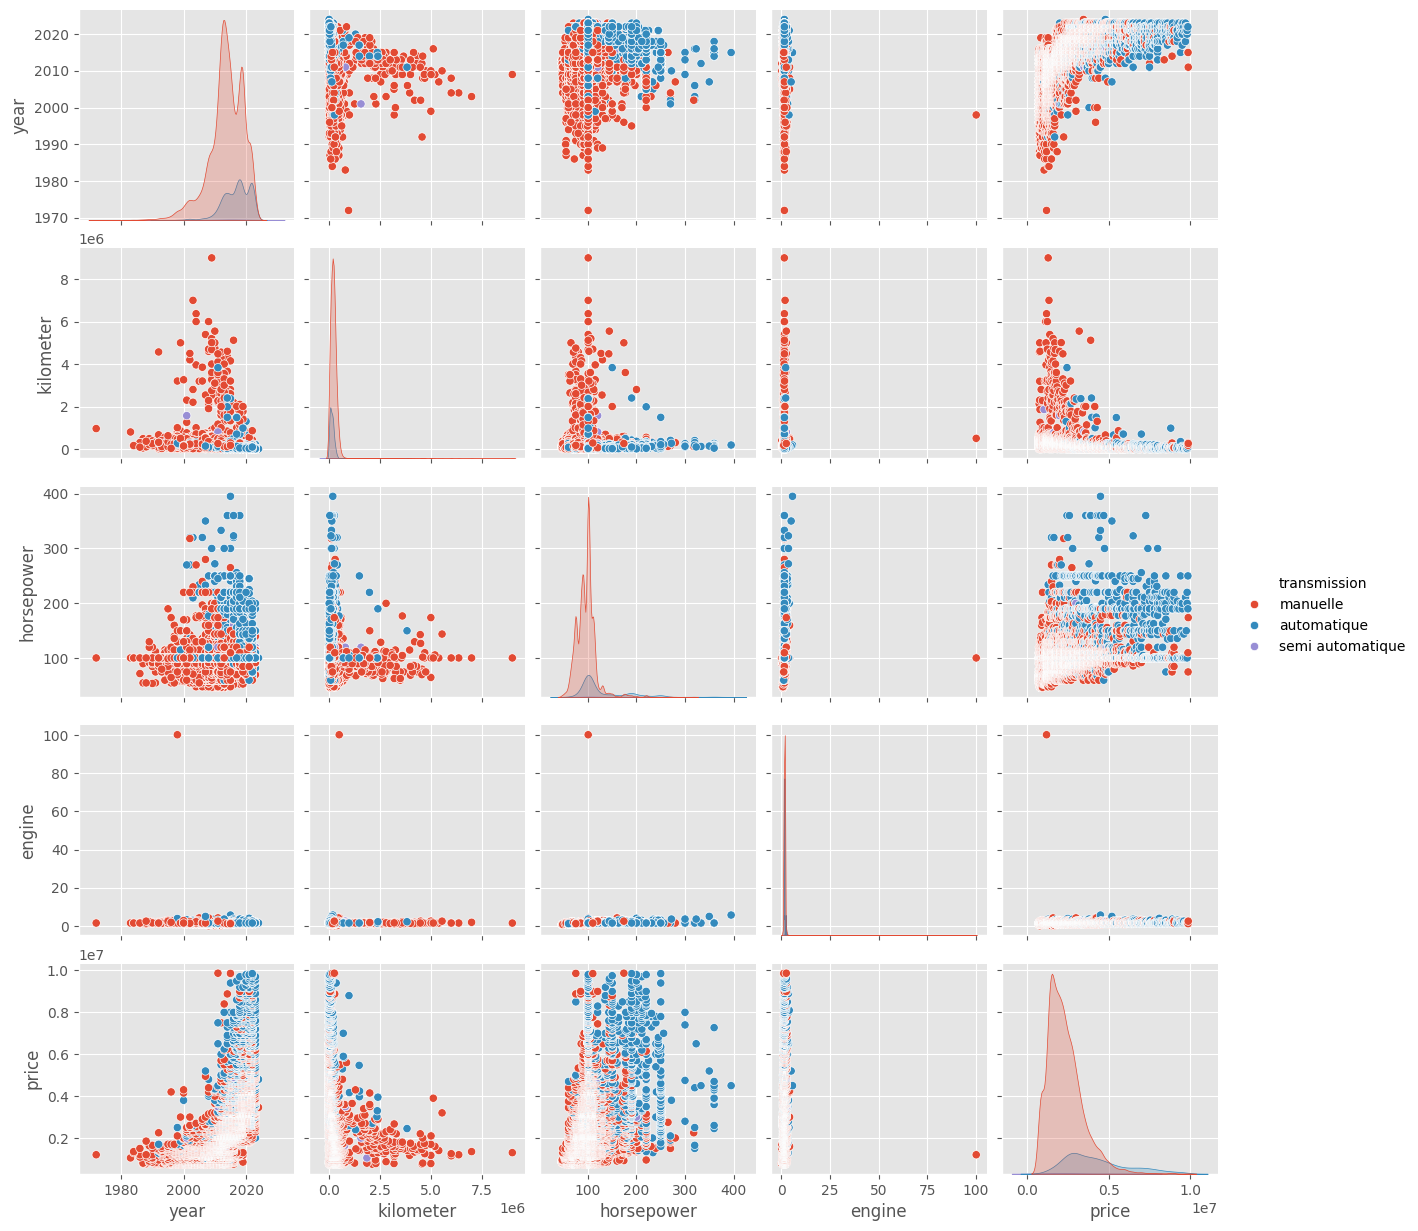

In [36]:
sns.pairplot(df,
             vars=['year','kilometer',
                   'horsepower','engine','price'],
            hue='transmission')
plt.show()

In [37]:
horsepower_skewness = df['horsepower'].skew()
print("Skewness of 'horsepower':", horsepower_skewness)

Skewness of 'horsepower': 3.0000818281793498


<Axes: >

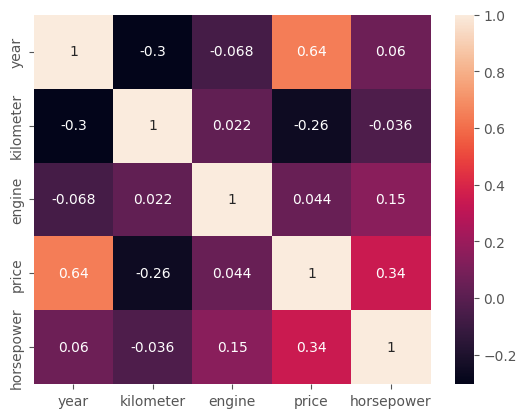

In [38]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [39]:
df['price_log'] = np.log1p(df['price'])
df['kilometer_log'] = np.log1p(df['kilometer'])
df['horsepower_log'] = np.log1p(df['horsepower'])

In [40]:
df.head()

,brand,model,year,kilometer,fuel,engine,transmission,price,horsepower,price_log,kilometer_log,horsepower_log
original_index,,,,,,,,,,,,
0,chana star,q20 simple cabine,2015.0,50000.0,diesel,1.527043,manuelle,750000.0,54.0,13.52783,10.819798,4.007333
1,chery,qq,2010.0,113000.0,essence,1.100000,manuelle,750000.0,68.0,13.52783,11.635152,4.234107
2,chery,qq,2010.0,170000.0,essence,1.100000,manuelle,750000.0,68.0,13.52783,12.043560,4.234107
3,chery,qq,2014.0,220000.0,essence,1.100000,manuelle,750000.0,68.0,13.52783,12.301387,4.234107
4,chery,qq,2014.0,270000.0,essence,1.100000,manuelle,750000.0,68.0,13.52783,12.506181,4.234107


In [41]:
price_skewness = df['price_log'].skew()
print("Skewness of 'price_log':", price_skewness)

kilometer_skewness = df['kilometer_log'].skew()
print("Skewness of 'kilometer_log':", kilometer_skewness)

horsepower_skewness = df['horsepower'].skew()
print("Skewness of 'horsepower_log':", horsepower_skewness)

Skewness of 'price_log': 0.11831052238518387
Skewness of 'kilometer_log': -0.8122916460144121
Skewness of 'horsepower_log': 3.0000818281793498


# **Preprocessing the data before the training**

- Create two copies from the dataframe (encoded and categorical) because of some models that have the ability to process categorical features without them being encoded
- drop the original columns and keep the ones with log

In [42]:
'''
df_encoded = df.copy()
df_encoded.drop('model',axis=1, inplace=True)
df_encoded.drop('price',axis=1, inplace=True)
df_encoded.drop('kilometer',axis=1, inplace=True)
df_encoded.drop('horsepower',axis=1, inplace=True)
df_encoded.drop('engine',axis=1, inplace=True)
df_categorical = df.copy()
df_categorical.drop('engine', axis=1, inplace=True)
df_categorical.drop('price', axis=1, inplace=True)
df_categorical.drop('kilometer', axis=1, inplace=True)
df_categorical.drop('horsepower', axis=1, inplace=True)'''


"\ndf_encoded = df.copy()\ndf_encoded.drop('model',axis=1, inplace=True)\ndf_encoded.drop('price',axis=1, inplace=True)\ndf_encoded.drop('kilometer',axis=1, inplace=True)\ndf_encoded.drop('horsepower',axis=1, inplace=True)\ndf_encoded.drop('engine',axis=1, inplace=True)\ndf_categorical = df.copy()\ndf_categorical.drop('engine', axis=1, inplace=True)\ndf_categorical.drop('price', axis=1, inplace=True)\ndf_categorical.drop('kilometer', axis=1, inplace=True)\ndf_categorical.drop('horsepower', axis=1, inplace=True)"

In [43]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['price','kilometer']
df_numerical = df[columns_to_normalize]
df_numerical_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)


df_other_features = df.drop(columns=columns_to_normalize)
df_normalized = pd.concat([df_numerical_normalized, df_other_features], axis=1)

In [44]:
df_normalized

,price,kilometer,brand,model,year,fuel,engine,transmission,horsepower,price_log,kilometer_log,horsepower_log
0,0.000000,0.005003,chana star,q20 simple cabine,2015.0,diesel,1.527043,manuelle,54.0,13.527830,10.819798,4.007333
1,0.000000,0.012007,chery,qq,2010.0,essence,1.100000,manuelle,68.0,13.527830,11.635152,4.234107
2,0.000000,0.018344,chery,qq,2010.0,essence,1.100000,manuelle,68.0,13.527830,12.043560,4.234107
3,0.000000,0.023902,chery,qq,2014.0,essence,1.100000,manuelle,68.0,13.527830,12.301387,4.234107
4,0.000000,0.029461,chery,qq,2014.0,essence,1.100000,manuelle,68.0,13.527830,12.506181,4.234107
...,...,...,...,...,...,...,...,...,...,...,...,...
15502,0.997807,0.009672,bmw,serie 3,2022.0,diesel,1.527043,automatique,190.0,16.102982,11.429555,5.252273
15503,0.997807,0.021679,mercedes,carlsson classe s,2015.0,diesel,1.527043,automatique,250.0,16.102982,12.206078,5.525453
15504,0.997807,0.030906,renault,kangoo privilege plus,2015.0,diesel,1.500000,manuelle,110.0,16.102982,12.553206,4.709530
15505,0.998904,0.018455,renault,clio 4 dynamique plus,2015.0,essence,1.200000,manuelle,75.0,16.103997,12.049425,4.330733


In [45]:
print(df_normalized['kilometer'].skew())

10.551364610307303


In [46]:
#df_encoded = df_normalized[['kilometer','brand', 'cylinder', 'horsepower', 'fuel', 'year', 'transmission', 'price']].copy()
#df_not_encoded = df_normalized[['brand', 'year', 'kilometer', 'fuel', 'transmission', 'price', 'cylinder', 'horsepower', 'price']].copy()

In [47]:
df_encoded=df[['brand', 'year', 'kilometer_log', 'fuel', 'transmission', 'engine', 'horsepower_log', 'price']].copy()

In [48]:
'''from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['fuel'] = le.fit_transform(df_encoded['fuel'])
df_encoded['transmission'] = le.fit_transform(df_encoded['transmission'])
df_encoded'''

"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\ndf_encoded['fuel'] = le.fit_transform(df_encoded['fuel'])\ndf_encoded['transmission'] = le.fit_transform(df_encoded['transmission'])\ndf_encoded"

In [49]:
fuel_mean = df_encoded.groupby('fuel')['price'].mean()
transmission_mean = df_encoded.groupby('transmission')['price'].mean()
brand_mean = df_encoded.groupby('brand')['price'].mean()


df_encoded['fuel_encoded'] = df_encoded['fuel'].map(fuel_mean)
df_encoded['transmission_encoded'] = df_encoded['transmission'].map(transmission_mean)
df_encoded['brand_encoded'] = df_encoded['brand'].map(brand_mean)


overall_mean = df_encoded['price'].mean()

def smoothing(n, mean, overall_mean, alpha=10):
    return (n * mean + alpha * overall_mean) / (n + alpha)

fuel_counts = df_encoded['fuel'].value_counts()
df_encoded['fuel_encoded_smooth'] = df_encoded['fuel'].map(lambda x: smoothing(fuel_counts[x], fuel_mean[x], overall_mean))

transmission_counts = df_encoded['transmission'].value_counts()
df_encoded['transmission_encoded_smooth'] = df_encoded['transmission'].map(lambda x: smoothing(transmission_counts[x], transmission_mean[x], overall_mean))

brand_counts = df_encoded['brand'].value_counts()
df_encoded['brand_encoded_smooth'] = df_encoded['brand'].map(lambda x: smoothing(brand_counts[x], brand_mean[x], overall_mean))


In [50]:
df_encoded

,brand,year,kilometer_log,fuel,transmission,engine,horsepower_log,price,fuel_encoded,transmission_encoded,brand_encoded,fuel_encoded_smooth,transmission_encoded_smooth,brand_encoded_smooth
original_index,,,,,,,,,,,,,,
0,chana star,2015.0,10.819798,diesel,manuelle,1.527043,4.007333,750000.0,2.937616e+06,2.327899e+06,1.051471e+06,2.937223e+06,2.328137e+06,1.411833e+06
1,chery,2010.0,11.635152,essence,manuelle,1.100000,4.234107,750000.0,2.433854e+06,2.327899e+06,1.086327e+06,2.434168e+06,2.328137e+06,1.161605e+06
2,chery,2010.0,12.043560,essence,manuelle,1.100000,4.234107,750000.0,2.433854e+06,2.327899e+06,1.086327e+06,2.434168e+06,2.328137e+06,1.161605e+06
3,chery,2014.0,12.301387,essence,manuelle,1.100000,4.234107,750000.0,2.433854e+06,2.327899e+06,1.086327e+06,2.434168e+06,2.328137e+06,1.161605e+06
4,chery,2014.0,12.506181,essence,manuelle,1.100000,4.234107,750000.0,2.433854e+06,2.327899e+06,1.086327e+06,2.434168e+06,2.328137e+06,1.161605e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,bmw,2022.0,11.429555,diesel,automatique,1.527043,5.252273,9850000.0,2.937616e+06,4.267648e+06,3.608231e+06,2.937223e+06,4.261068e+06,3.546374e+06
15503,mercedes,2015.0,12.206078,diesel,automatique,1.527043,5.525453,9850000.0,2.937616e+06,4.267648e+06,3.985429e+06,2.937223e+06,4.261068e+06,3.956431e+06
15504,renault,2015.0,12.553206,diesel,manuelle,1.500000,4.709530,9850000.0,2.937616e+06,2.327899e+06,2.447870e+06,2.937223e+06,2.328137e+06,2.448466e+06


In [51]:
X = df_encoded.drop(columns=['price' , 'brand', 'fuel', 'transmission', 'fuel_encoded', 'transmission_encoded', 'brand_encoded'])
y = df_encoded['price']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)



In [52]:
y=np.ravel(y)

In [53]:
y.shape

(15507,)

In [70]:
X

,year,kilometer_log,engine,horsepower_log,fuel_encoded_smooth,transmission_encoded_smooth,brand_encoded_smooth
original_index,,,,,,,
0,2015.0,10.819798,1.527043,4.007333,2.937223e+06,2.328137e+06,1.411833e+06
1,2010.0,11.635152,1.100000,4.234107,2.434168e+06,2.328137e+06,1.161605e+06
2,2010.0,12.043560,1.100000,4.234107,2.434168e+06,2.328137e+06,1.161605e+06
3,2014.0,12.301387,1.100000,4.234107,2.434168e+06,2.328137e+06,1.161605e+06
4,2014.0,12.506181,1.100000,4.234107,2.434168e+06,2.328137e+06,1.161605e+06
...,...,...,...,...,...,...,...
15502,2022.0,11.429555,1.527043,5.252273,2.937223e+06,4.261068e+06,3.546374e+06
15503,2015.0,12.206078,1.527043,5.525453,2.937223e+06,4.261068e+06,3.956431e+06
15504,2015.0,12.553206,1.500000,4.709530,2.937223e+06,2.328137e+06,2.448466e+06


ENCODING
- one-hot encoding for 'fuel and 'transmission
- frequency encoding for 'brand'

In [54]:
''''# Frequency encoding
brand_freq = df_encoded['brand'].value_counts().to_dict()
df_encoded['brand'] = df_encoded['brand'].map(brand_freq)
#one-hot encoding
onehot_cols = ['fuel', 'transmission']
df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols)'''



"'# Frequency encoding\nbrand_freq = df_encoded['brand'].value_counts().to_dict()\ndf_encoded['brand'] = df_encoded['brand'].map(brand_freq)\n#one-hot encoding\nonehot_cols = ['fuel', 'transmission']\ndf_encoded = pd.get_dummies(df_encoded, columns=onehot_cols)"

In [55]:
'''# Define a function for target encoding in the categorical dataframe
def target_encode(df, cat_cols, target_col):
    for col in cat_cols:
        mean_encoded = df.groupby(col)[target_col].mean()
        df[col] = df[col].map(mean_encoded)
    return df'''

'# Define a function for target encoding in the categorical dataframe\ndef target_encode(df, cat_cols, target_col):\n    for col in cat_cols:\n        mean_encoded = df.groupby(col)[target_col].mean()\n        df[col] = df[col].map(mean_encoded)\n    return df'

In [56]:
'''# Apply target encoding for the brand, fuel, and transmission columns in the categorical DataFrame
cat_cols = ['brand', 'fuel', 'transmission']
df_categorical = target_encode(df_categorical, cat_cols, 'price_log')

# Separate features and target for both dataframes
X_encoded = df_encoded.drop('price_log', axis=1)
y_encoded = df_encoded['price_log']
X_categorical = df_categorical.drop('price_log', axis=1)
y_categorical = df_categorical['price_log']'''


"# Apply target encoding for the brand, fuel, and transmission columns in the categorical DataFrame\ncat_cols = ['brand', 'fuel', 'transmission']\ndf_categorical = target_encode(df_categorical, cat_cols, 'price_log')\n\n# Separate features and target for both dataframes\nX_encoded = df_encoded.drop('price_log', axis=1)\ny_encoded = df_encoded['price_log']\nX_categorical = df_categorical.drop('price_log', axis=1)\ny_categorical = df_categorical['price_log']"

In [57]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import time

In [58]:
'''# separate numerical columns for preprocessing
num_cols_encoded = X_encoded.select_dtypes(include=['float64', 'int64']).coluX_trainrical = X_categorical.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing for numerical data
num_pipeline = Pipeliney_test SimpleImputer(strategy='mean'))y_testng values with the mean
    ('scaler', StandardScX_trainne preprocessing steps for encoded dataframe
preprocessor_encoded = ColumnTransformer([
    ('num', num_pipeline, num_coly_testombine preprocessing steps for cy_testme
preprocessor_categorical = ColumnTransformer([
    ('num', num_pipeline, num_cols_categorical)
])

X_trainng
X_encoded_preprocessed = prey_testfit_transform(X_encoded)
X_categorical_preprocessed = preprocessor_categorical.fit_transform(X_categorical)

# Ensure X_encoded_preprocessed and X_categorical_preprocessed are dense matrices if needed
if not isinstanceX_trainssed, np.ndarray):
    X_encoded_preprocessed = X_encoded_preprocessed.toarray()

if not isinstance(X_categorical_preprocessed, np.ndarray):
    X_categorical_y_testategorical_preprocessed.toarray(y_testa
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_preprocessed, y_encoded, test_size=0.2, randX_trainn, X_tey_testrical, y_test = train_test_split(
    X_cX_trainssed, y_categorical, test_size=0.2, random_y_test'''

"# separate numerical columns for preprocessing\nnum_cols_encoded = X_encoded.select_dtypes(include=['float64', 'int64']).coluX_trainrical = X_categorical.select_dtypes(include=['float64', 'int64']).columns\n\n# Preprocessing for numerical data\nnum_pipeline = Pipeliney_test SimpleImputer(strategy='mean'))y_testng values with the mean\n    ('scaler', StandardScX_trainne preprocessing steps for encoded dataframe\npreprocessor_encoded = ColumnTransformer([\n    ('num', num_pipeline, num_coly_testombine preprocessing steps for cy_testme\npreprocessor_categorical = ColumnTransformer([\n    ('num', num_pipeline, num_cols_categorical)\n])\n\nX_trainng\nX_encoded_preprocessed = prey_testfit_transform(X_encoded)\nX_categorical_preprocessed = preprocessor_categorical.fit_transform(X_categorical)\n\n# Ensure X_encoded_preprocessed and X_categorical_preprocessed are dense matrices if needed\nif not isinstanceX_trainssed, np.ndarray):\n    X_encoded_preprocessed = X_encoded_preprocessed.toarray()\

# **Training**

In [59]:
from sklearn.model_selection import learning_curve
def evaluating(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    plt.show()

# KNN

KNN Mean Squared Error: 413339510970.103
KNN R-squared: 0.7961672458031359
KNN Mean Absolute Error: 345560.8676248235


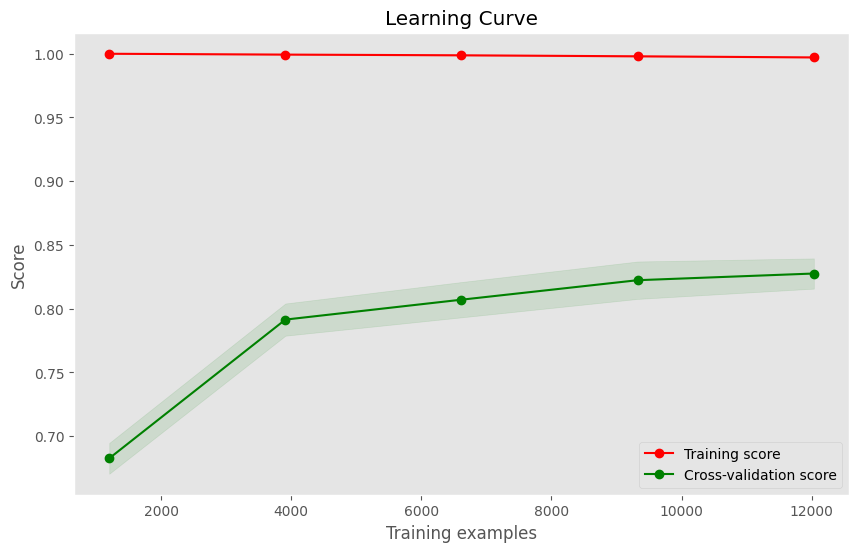

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("KNN Mean Squared Error:", mse_knn)
print("KNN R-squared:", r2_knn)
print("KNN Mean Absolute Error:", mae_knn)
evaluating(knn, X_train, y_train, X_test, y_test)


#LINEAR REGRESSION

LINEAR Mean Squared Error: 593190711754.2843
LINEAR R-squared: 0.7074760739492444
SVM Mean Absolute Error: 517194.6616204743


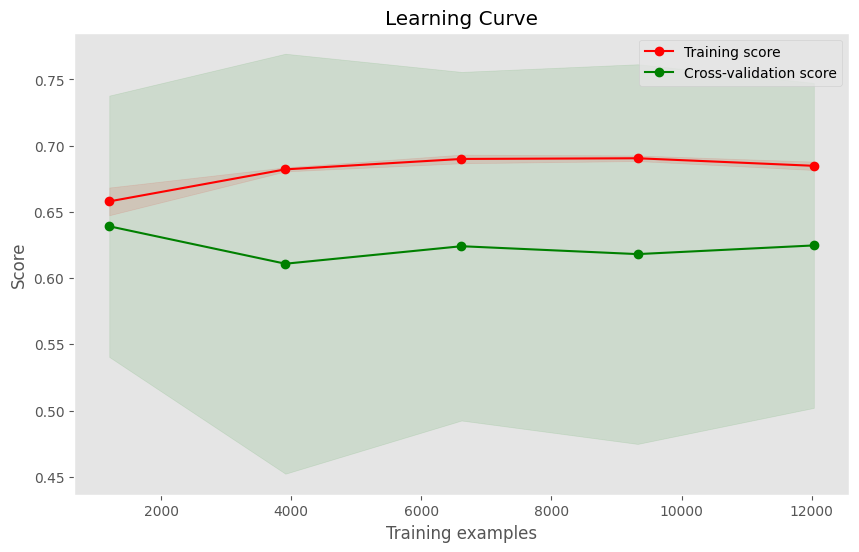

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the LinearRegression model
linear = LinearRegression()

# Train the model
linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("LINEAR Mean Squared Error:", mse_linear)
print("LINEAR R-squared:", r2_linear)
print("SVM Mean Absolute Error:", mae_linear)
evaluating(linear, X_train, y_train, X_test, y_test)


# GRADIENT BOOSTING

GBM Mean Squared Error: 259449430848.88983
GBM R-squared: 0.87205604433842
GBM Mean Absolute Error: 336430.5862403699


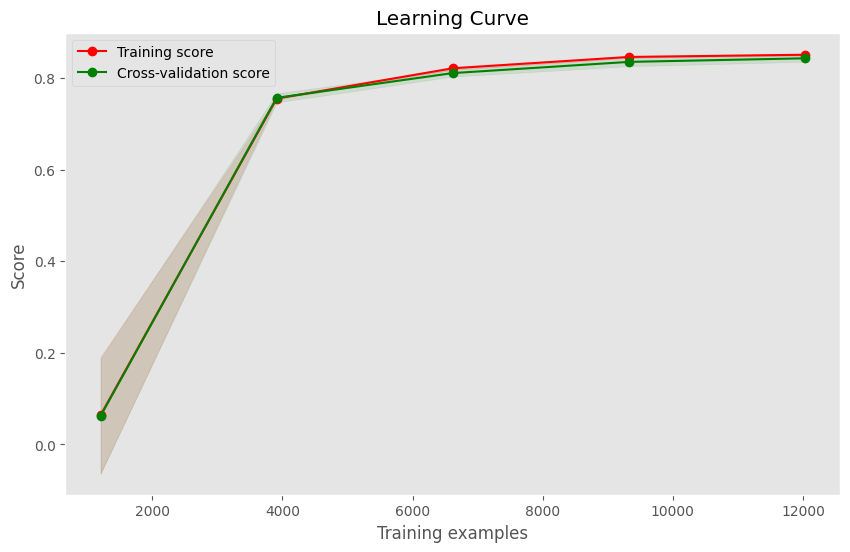

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the GradientBoostingRegressor model
gbm = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, max_depth=7, min_samples_split=300, min_samples_leaf=600)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
print("GBM Mean Squared Error:", mse_gbm)
print("GBM R-squared:", r2_gbm)
print("GBM Mean Absolute Error:", mae_gbm)

evaluating(gbm, X_train, y_train, X_test, y_test)




# RANDOM FOREST

RF Mean Squared Error: 294568966450.4543
RF R-squared: 0.8547373233408052
RF Mean Absolute Error: 326558.24237934215


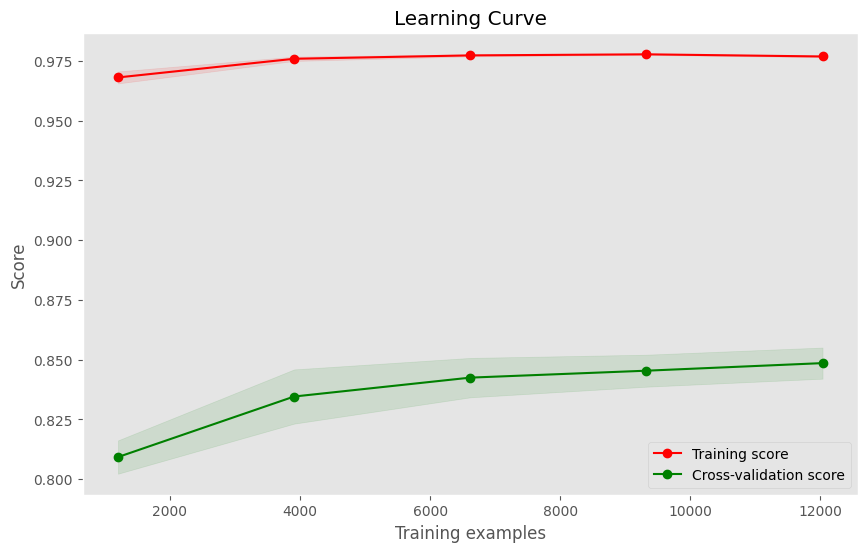

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("RF Mean Squared Error:", mse_rf)
print("RF R-squared:", r2_rf)
print("RF Mean Absolute Error:", mae_rf)
evaluating(rf, X_train, y_train, X_test, y_test)


# HISTOGRAM-GRADIENT BOOSRING

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HGB Mean Squared Error: 237340252155.7453
HGB R-squared: 0.8829588849003527
HGB Mean Absolute Error: 320126.9860485246


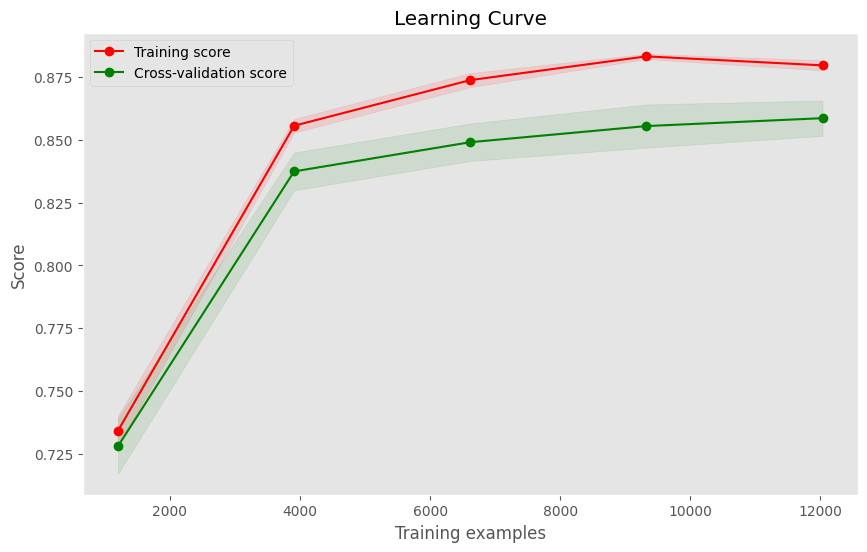

In [64]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the HistGradientBoostingRegressor model
hgb = HistGradientBoostingRegressor(learning_rate=0.2, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=200)

# Train the model
hgb.fit(X_train, y_train)

# Make predictions
y_pred_hgb = hgb.predict(X_test)

# Evaluate the model
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
print("HGB Mean Squared Error:", mse_hgb)
print("HGB R-squared:", r2_hgb)
print("HGB Mean Absolute Error:", mae_hgb)
evaluating(hgb, X_train, y_train, X_test, y_test)

# DECISION TREE

DT Mean Squared Error: 537453774737.7206
DT R-squared: 0.7349619858474783
DT Mean Absolute Error: 405101.9313304721


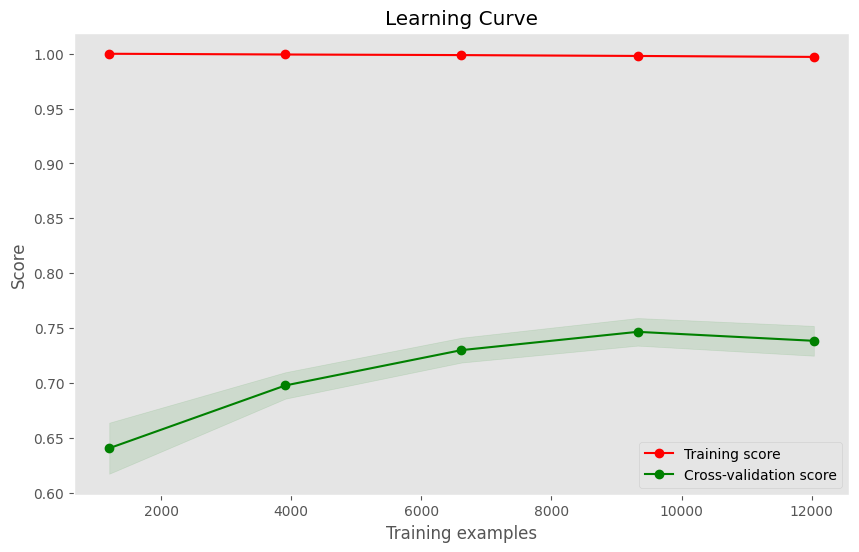

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the DecisionTreeRegressor model
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("DT Mean Squared Error:", mse_dt)
print("DT R-squared:", r2_dt)
print("DT Mean Absolute Error:", mae_dt)
evaluating(dt, X_train, y_train, X_test, y_test)


#LIGHT GRADIENT BOOSTING

LGB Mean Squared Error: 279096159682.56714
LGB R-squared: 0.8623675274102208
LGB Mean Absolute Error: 358669.51162096026


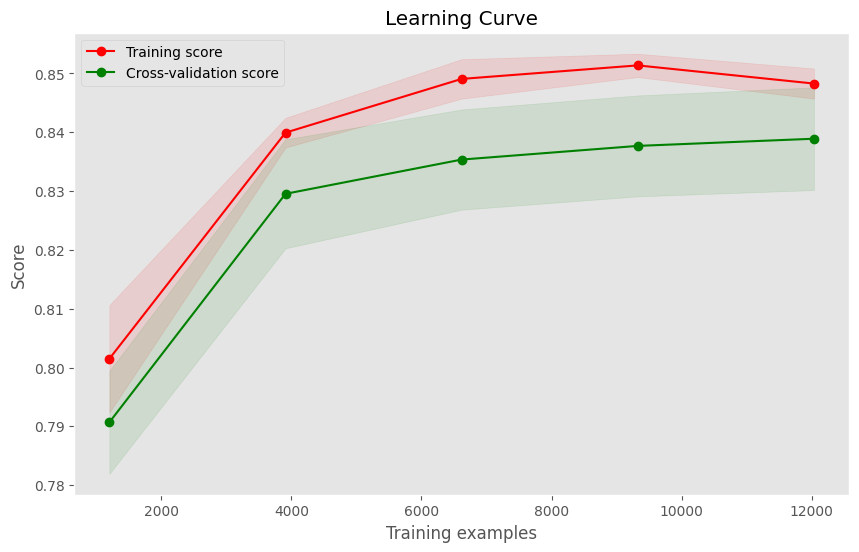

In [66]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the LightGBM regressor
lgb_reg = lgb.LGBMRegressor(
    bagging_fraction=0.8,
    feature_fraction=0.8,
    n_estimators=1000, # Number of boosting iterations
    #early_stopping_rounds=50,
    learning_rate=0.005,      # Lower learning rate
    num_leaves=20,           # Number of leaves
    max_depth=4,            # No maximum depth
     # Fraction of features to consider at each split
    subsample=0.8,           # Fraction of data to be used for each iteration
    subsample_freq=1,        # Frequency of subsampling
    reg_alpha=0.5,           # L1 regularization term
    reg_lambda=0.5,          # L2 regularization term
    min_child_samples=50,    # Minimum number of samples per leaf
    min_split_gain=0.01,      # Minimum gain to make a split
      verbose=-1         # Suppress detailed LightGBM warnings
)
# Train the model
lgb_reg.fit(X_train, y_train)
y_pred_lgb = lgb_reg.predict(X_test, num_iteration=lgb_reg.best_iteration_)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
print("LGB Mean Squared Error:", mse_lgb)
print("LGB R-squared:", r2_lgb)
print("LGB Mean Absolute Error:", mae_lgb)
evaluating(lgb_reg, X_train, y_train, X_test, y_test)


# X GRADIENT BOOSTING

XGB Mean Squared Error: 309561137193.2808
XGB R-squared: 0.8473441383855905
XGB Mean Absolute Error: 381592.344554721


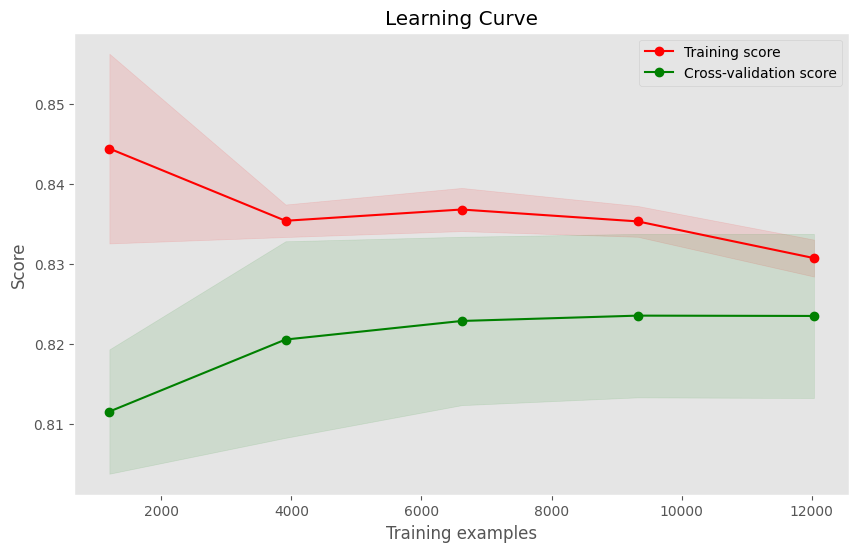

In [67]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=0.1  # L2 regularization
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGB Mean Squared Error:", mse_xgb)
print("XGB R-squared:", r2_xgb)
print("XGB Mean Absolute Error:", mae_xgb)
evaluating(xgb_model, X_train, y_train, X_test, y_test)


## **CATBOOST**

In [68]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [71]:
import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score

# Define the CatBoost regressor
cat_model = cb.CatBoostRegressor(
    learning_rate=0.05,
    depth =12,
    iterations=1000,
    l2_leaf_reg=3,
    bagging_temperature=0.2,
    random_strength=1,
    border_count=128,
    silent=True
)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
print("CAT Mean Squared Error:", mse_cat)
print("CAT R-squared:", r2_cat)
print("CAT Mean Absolute Error:", mae_cat)
evaluating(cat_model, X_train, y_train, X_test, y_test)

CAT Mean Squared Error: 197018811876.08435
CAT R-squared: 0.9028428543909492
CAT Mean Absolute Error: 291149.6435196681


KeyboardInterrupt: 

## **SUPER VECTOR MACHINE**

In [72]:
from sklearn.svm import SVR

# Instantiate the model (using SVR for regression tasks)
svm_model = SVR()

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print("SVM Mean Squared Error:", mse_svm)
print("SVM R-squared:", r2_svm)
print("SVM Mean Absolute Error:", mae_svm)

evaluating(svm_model, X_train, y_train, X_test, y_test)

SVM Mean Squared Error: 2121046497388.4167
SVM R-squared: -0.04596521229630013
SVM Mean Absolute Error: 1015562.3060312438


KeyboardInterrupt: 

## **NEURAL NETWORKS**

In [ ]:
def evaluating_1(model, X_train, y_train, X_test, y_test):
    # Check if the model has a 'score' method
    if hasattr(model, 'score'):
        # Use the 'score' method to evaluate the model
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
    else:
        # Use the Keras model's built-in evaluation method
        train_loss, train_score = model.evaluate(X_train, y_train)
        test_loss, test_score = model.evaluate(X_test, y_test)

    # Print the evaluation metrics
    print(f"Train Score: {train_score}")
    print(f"Test Score: {test_score}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print("NN Mean Squared Error:", mse_nn)
print("NN R-squared:", r2_nn)
print("NN Mean Absolute Error:", mae_nn)

ModuleNotFoundError: No module named 'tensorflow'

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 1200x600 with 0 Axes>

In [75]:
models = {
    ('KNN', knn),
    ('Linear', linear),
    ('GBM', gbm),
    ('RF', rf),
    ('HGB', hgb),
    ('DT', dt),
    ('XGB', xgb_model),
    ('LGB', lgb_reg),
    ('SVM', svm_model)
}

In [76]:
def plot_cross_validation_results(models, X_train, y_train, cv=5):
    """
    Plots cross-validation results for multiple models on a single plot.
    
    Parameters:
    models (list): List of tuples containing (model_name, model_instance)
    X_train (array-like): Training data features
    y_train (array-like): Training data labels
    cv (int): Number of cross-validation folds
    """
    
    plt.figure(figsize=(14, 12))
    plt.title("Cross-Validation Scores for Multiple Models")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    for model_name, model in models:
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv)

        test_scores_mean = np.mean(test_scores, axis=1)

        plt.plot(train_sizes, test_scores_mean, 'o-', label=f"{model_name} Cross-validation score")

    plt.legend(loc="best")
    plt.show()

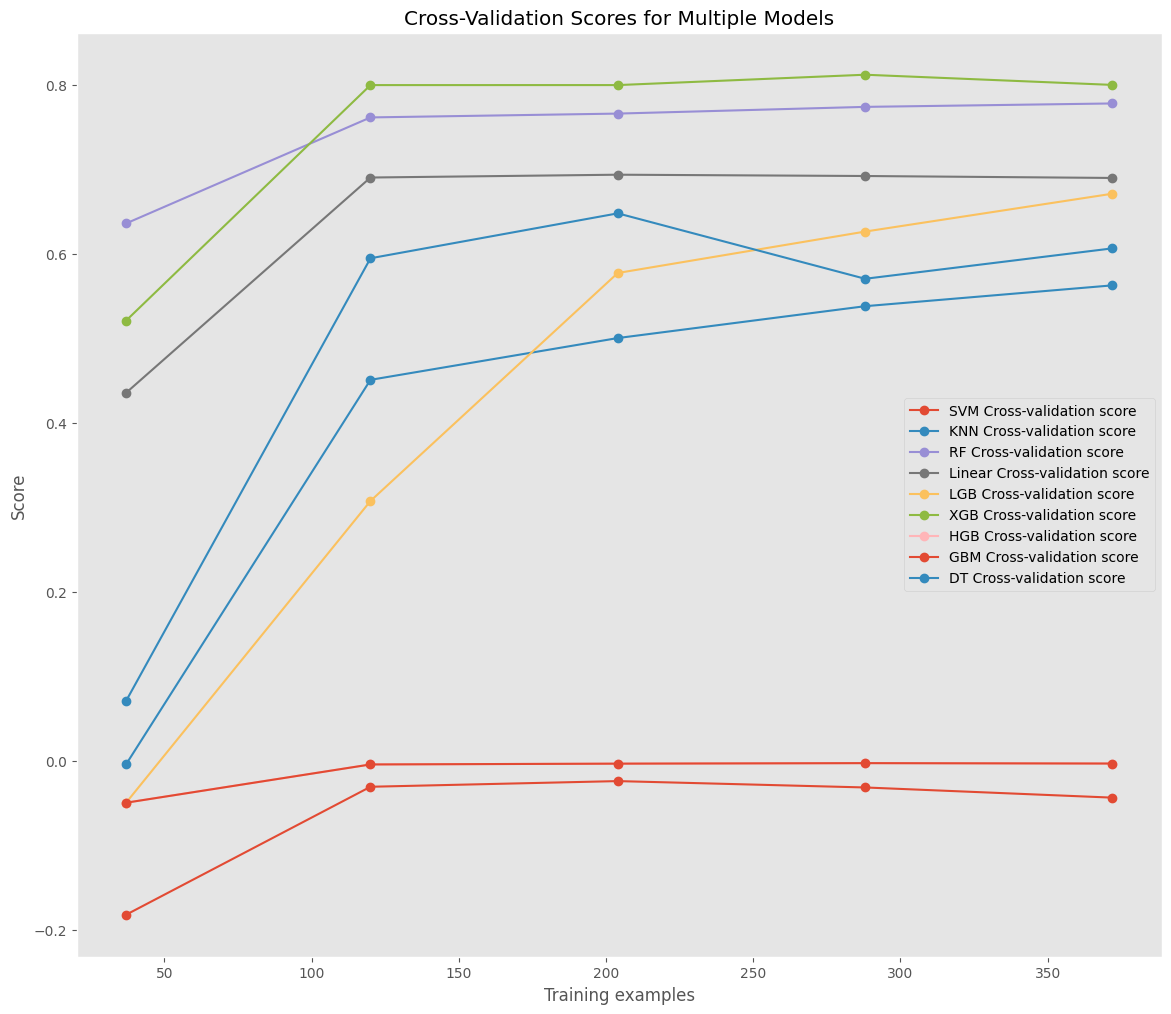

In [77]:
plot_cross_validation_results(models,X_test,y_test,cv=5)

In [78]:
import joblib

In [79]:
joblib.dump(hgb, 'histboost_ouedkniss.joblib')

['histboost_ouedkniss.joblib']

In [83]:
brand_mapping_smoothed = {brand: smoothing(count, brand_mean[brand], overall_mean)
                          for brand, count in brand_counts.items()}

# Save the smoothed mapping
joblib.dump(brand_mapping_smoothed, 'brand_mapping_smoothed.joblib')

['brand_mapping_smoothed.joblib']

In [84]:
brand_mapping_smoothed

{'renault': 2448466.4710465944,
 'peugeot': 2378974.559005486,
 'hyundai': 2566139.515136128,
 'volkswagen': 3031878.293589344,
 'kia': 2887901.8993413565,
 'dacia': 2839093.570366953,
 'seat': 3216650.392471427,
 'citroen': 2820391.2945687785,
 'chevrolet': 1595864.2517069397,
 'mercedes': 3956431.497117847,
 'toyota': 3071381.7098300215,
 'suzuki': 1705387.265192285,
 'nissan': 2382675.3998673228,
 'skoda': 3043875.5146471793,
 'ford': 1910214.3012197127,
 'land rover': 4303273.20454881,
 'chery': 1161605.0784456253,
 'audi': 4935033.409229579,
 'bmw': 3546373.542419101,
 'fiat': 2239521.697653785,
 'opel': 1942933.7491873766,
 'great wall': 1642072.2408673782,
 'dfsk': 1339568.325879394,
 'mitsubishi': 3363646.1539363456,
 'daihatsu': 1678236.5813288623,
 'chana star': 1411832.8672681546,
 'zotye': 1387396.3371380668,
 'gonow': 1638395.8421567243,
 'geely': 1695573.5044388557,
 'lifan': 1685645.1924937125,
 'ssangyong': 1856895.1924937125,
 'mini cooper': 2614025.846391952,
 'mazda'

In [85]:
fuel_mapping_smoothed = {fuel: smoothing(count, fuel_mean[fuel], overall_mean)
                          for fuel, count in fuel_counts.items()}

# Save the smoothed mapping
joblib.dump(fuel_mapping_smoothed, 'fuel_mapping_smoothed.joblib')

['fuel_mapping_smoothed.joblib']

In [86]:
fuel_mapping_smoothed

{'diesel': 2937223.440062743,
 'essence': 2434167.6396670467,
 'gpl': 1938834.269728815}

In [87]:
transmission_mapping_smoothed = {transmission: smoothing(count, transmission_mean[transmission], overall_mean)
                          for transmission, count in transmission_counts.items()}

# Save the smoothed mapping
joblib.dump(transmission_mapping_smoothed, 'transmission_mapping_smoothed.joblib')

['transmission_mapping_smoothed.joblib']

In [88]:
transmission_mapping_smoothed

{'manuelle': 2328136.8084116452,
 'automatique': 4261067.653817514,
 'semi automatique': 2500700.7958586}